<a href="https://colab.research.google.com/github/nagabathula/C255-DataMIning/blob/main/Assignment2_Muticlass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 25.5 MB/s 
     |████████████████████████████████| 6.8 MB 62.7 MB/s 
     |████████████████████████████████| 1.3 MB 47.4 MB/s 
     |████████████████████████████████| 25.9 MB 1.5 MB/s 
     |████████████████████████████████| 268 kB 59.0 MB/s 
     |████████████████████████████████| 636 kB 62.0 MB/s 
     |████████████████████████████████| 56 kB 5.6 MB/s 
     |████████████████████████████████| 1.7 MB 55.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 5.1 MB/s 
     |████████████████████████████████| 10.4 MB 50.4 MB/s 
     |████████████████████████████████| 3.3 MB 54.5 MB/s 
     |████████████████████████████████| 167 kB 58.3 MB/s 
     |████████████████████████████████|

In [1]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [2]:
from google.colab import files
files.upload() 

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nagabathula","key":"7d804089a3ac8fb343251b2faadde02b"}'}

In [3]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c bitsf312-lab1

  0% 0.00/11.5k [00:00<?, ?B/s]
100% 11.5k/11.5k [00:00<00:00, 10.4MB/s]


In [7]:
!unzip /content/bitsf312-lab1.zip

Archive:  /content/bitsf312-lab1.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [8]:
!mkdir /content/bitsf312-lab1
!mv sample_submission.csv test.csv train.csv /content/bitsf312-lab1

In [30]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('/content/bitsf312-lab1/train.csv')
dataset.shape
#dataset.head

dataset.isna().sum()

to_encode = dataset['Size']
encoded = [0 for i in range(len(to_encode))]
for i in range(len(to_encode)):
    if(to_encode[i]=='Medium'):
        encoded[i]=1
    elif(to_encode[i]=='Small'):
        encoded[i]=2
    elif(to_encode[i]=='Big'):
        encoded[i]=3
    else:
        to_encode[i]=-1
dataset['Size'] = encoded

dataset=dataset.apply(pd.to_numeric, errors='coerce').dropna()

dataset = dataset.drop(['ID'], axis=1)

dataset.head

<bound method NDFrame.head of      Number of Quantities  Number of Insignificant Quantities  Size  \
0                     2.0                                 0.0     1   
1                     2.0                                 0.0     1   
2                     2.0                                 0.0     1   
3                     2.0                                 0.0     0   
4                     2.0                                 0.0     1   
..                    ...                                 ...   ...   
366                   2.0                                 0.0     2   
367                   3.0                                 1.0     1   
368                   2.0                                 0.0     2   
369                   2.0                                 0.0     1   
370                   2.0                                 0.0     1   

     Total Number of Words  Total Number of Characters  \
0                     19.0                          68   
1

In [31]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

data.head

Data for Modeling: (322, 12)
Unseen Data For Predictions: (36, 12)


<bound method NDFrame.head of      Number of Quantities  Number of Insignificant Quantities  Size  \
0                     2.0                                 0.0     1   
1                     2.0                                 0.0     1   
2                     2.0                                 0.0     1   
3                     3.0                                 1.0     1   
4                     2.0                                 0.0     2   
..                    ...                                 ...   ...   
317                   2.0                                 0.0     2   
318                   2.0                                 0.0     3   
319                   2.0                                 0.0     2   
320                   2.0                                 0.0     1   
321                   3.0                                 1.0     2   

     Total Number of Words  Total Number of Characters  \
0                     32.0                         106   
1

In [32]:
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'Class', session_id=123) 

,Description,Value
0,session_id,123
1,Target,Class
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(322, 12)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [33]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6759,0.8942,0.5212,0.6314,0.6447,0.5819,0.5889,0.152
gbc,Gradient Boosting Classifier,0.6625,0.8849,0.4942,0.6420,0.6297,0.5633,0.5761,0.510
rf,Random Forest Classifier,0.6449,0.8863,0.4793,0.5940,0.5963,0.5377,0.5547,0.461
et,Extra Trees Classifier,0.5957,0.8656,0.4345,0.5891,0.5740,0.4778,0.4896,0.461
lr,Logistic Regression,0.5816,0.8280,0.4158,0.5106,0.5284,0.4488,0.4668,0.703
ridge,Ridge Classifier,0.5773,0.0000,0.3961,0.4651,0.5002,0.4336,0.4618,0.013
lda,Linear Discriminant Analysis,0.5597,0.7680,0.3897,0.4841,0.5044,0.4167,0.4357,0.018
dt,Decision Tree Classifier,0.5557,0.7240,0.4448,0.5529,0.5413,0.4363,0.4431,0.016
knn,K Neighbors Classifier,0.4935,0.7354,0.3483,0.4435,0.4469,0.3329,0.3500,0.117
ada,Ada Boost Classifier,0.4889,0.7589,0.3631,0.4755,0.4500,0.3345,0.3534,0.098


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [37]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6957,0.8846,0.5984,0.6703,0.6775,0.6054,0.6101
1,0.7826,0.9093,0.6056,0.7518,0.7619,0.7195,0.7232
2,0.7391,0.9076,0.5540,0.7246,0.7263,0.6675,0.6707
3,0.4783,0.7923,0.3619,0.3842,0.4146,0.3219,0.3352
4,0.6087,0.8761,0.4429,0.5391,0.5627,0.4939,0.5031
5,0.7727,0.9256,0.6151,0.7439,0.7525,0.7090,0.7128
6,0.6818,0.9355,0.6119,0.6758,0.6756,0.5979,0.5995
7,0.6818,0.9223,0.5167,0.6601,0.6570,0.5969,0.6065
8,0.6364,0.8715,0.4611,0.5373,0.5751,0.5243,0.5353


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [38]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6087,0.8280,0.4000,0.5145,0.5240,0.4637,0.5171
1,0.6087,0.9010,0.4095,0.5208,0.5332,0.4773,0.5040
2,0.7826,0.9127,0.5556,0.7161,0.7144,0.7096,0.7322
3,0.5652,0.8202,0.4190,0.3992,0.4663,0.4221,0.4462
4,0.5652,0.8265,0.4190,0.4514,0.4976,0.4279,0.4438
5,0.5909,0.8685,0.4413,0.6114,0.5685,0.4605,0.4716
6,0.6364,0.9225,0.4567,0.5935,0.5807,0.5111,0.5293
7,0.6818,0.8821,0.4944,0.5795,0.6213,0.5838,0.5943
8,0.5909,0.8668,0.4056,0.4489,0.4968,0.4560,0.4859


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:LGBMClassifier(bagging_fraction=1.0, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=80, n_jobs=-1, num_leaves=60, objective=None,
               random_state=123, reg_alpha=0.0005, reg_lambda=0.4,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


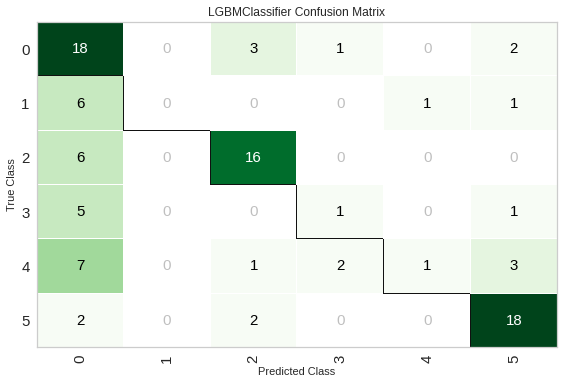

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [39]:
plot_model(tuned_lightgbm, plot = 'confusion_matrix')

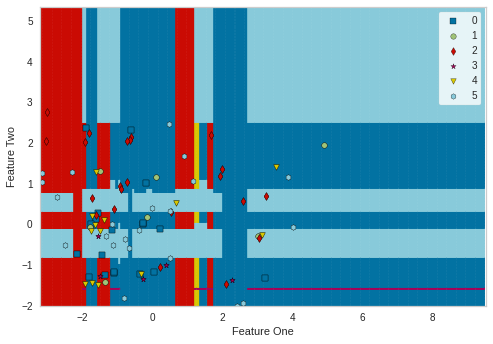

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [40]:
plot_model(tuned_lightgbm, plot='boundary')

In [41]:
evaluate_model(tuned_lightgbm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(bagging_fraction=1.0, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=80, n_jobs=-1, num_leaves=60, objective=None,
               random_state=123, reg_alpha=0.0005, reg_lambda=0.4,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [42]:
predict_model(tuned_lightgbm)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=1.0, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=80, n_jobs=-1, num_leaves=60, objective=None,
               random_state=123, reg_alpha=0.0005, reg_lambda=0.4,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.5567,0.7864,0.4183,0.5197,0.5008,0.4257,0.4466


,Total Number of Words,Total Number of Characters,Number of Special Characters,Second Index,Difficulty,Score,Number of Insignificant Quantities_1.0,Size_0,Size_1,Size_2,...,First Index_3,First Index_4,First Index_5,First Index_6,First Index_7,First Index_8,First Index_9,Class,Label,Score
0,16.0,69.0,1.0,6.0,9.743311,7.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5,0.4995
1,20.0,75.0,3.0,8.0,7.702654,15.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.2932
2,26.0,98.0,3.0,7.0,8.357071,101.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.5414
3,18.0,67.0,3.0,8.0,9.095418,2.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4,5,0.3540
4,23.0,80.0,4.0,7.0,3.234634,13.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0,0.3485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,21.0,68.0,3.0,8.0,8.936493,17408.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,0.3740
93,28.0,104.0,3.0,9.0,9.777841,4.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,5,0.4211
94,24.0,93.0,2.0,5.0,1.547371,8.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5,0.5632
95,34.0,126.0,4.0,17.0,3.676099,12.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,0,0.3465


In [43]:
final_lightgbm = finalize_model(tuned_lightgbm)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMClassifier(bagging_fraction=1.0, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=80, n_jobs=-1, num_leaves=60, objective=None,
               random_state=123, reg_alpha=0.0005, reg_lambda=0.4,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LGBMClassifier(bagging_fraction=1.0, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.01, max_depth=-1,
       

In [44]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=1.0, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=80, n_jobs=-1, num_leaves=60, objective=None,
               random_state=123, reg_alpha=0.0005, reg_lambda=0.4,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.6111,0.8547,0.4741,0.5556,0.5741,0.4598,0.4696


,Number of Quantities,Number of Insignificant Quantities,Size,Total Number of Words,Total Number of Characters,Number of Special Characters,Number of Sentences,First Index,Second Index,Difficulty,Score,Class,Label,Score
0,2.0,0.0,1,18.0,64,3.0,3,2,7,1.304390,77.0,4,3,0.3424
1,2.0,0.0,1,22.0,78,2.0,2,2,11,2.205067,6.0,5,5,0.6811
2,2.0,0.0,1,20.0,84,3.0,3,3,9,9.212072,97.0,0,0,0.5969
3,2.0,0.0,1,21.0,75,3.0,3,2,7,2.103881,69.0,0,0,0.3965
4,2.0,0.0,1,26.0,88,3.0,3,2,9,1.408650,36.0,0,0,0.6212


In [46]:
save_model(final_lightgbm,'Final KNN Model 08Sep2022')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LGBMClassifier(bagging_fraction=1.0, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=80, n_jobs=-1, num_leaves=60, objective=None,
               random_state=123, reg_alpha=0.0005, reg_lambda=0.4,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), model_name=Final KNN Model 08Sep2022, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                        

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                                 colsample_bytree=1.0, feature_fraction=0.7,
                                 importance_type='split', learning_rate=0.01,
                                 max_depth=-1, min_child_samples=11,
                                 min_child_weight=